In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("Synthetic/29/train.txt",delimiter=",")

In [3]:
train_data_classes = np.asarray([train_data[np.where(train_data[:,2]==i)] for i in [1,2]])

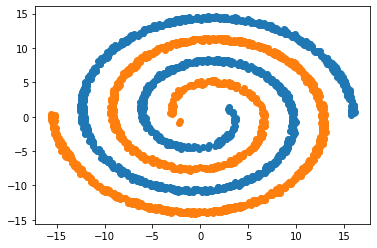

In [4]:
plt.scatter(train_data_classes[0,:,0],train_data_classes[0,:,1])
plt.scatter(train_data_classes[1,:,0],train_data_classes[1,:,1])
plt.show()

In [14]:
def k_means(data,k=15):
    # reshape data for numpy broadcasting
    data = np.reshape(data,[-1,1,data.shape[-1]])
    # initialize k means with random means
    kmeans = np.vstack([np.random.choice(data[:,0,i],k) for i in range(0,data.shape[-1])]).T
    # reshape data for numpy broadcasting
    kmeans = np.reshape(kmeans,[1,-1,kmeans.shape[-1]])
    # calculate distances with some broadcasting magic
    dists = np.sum((data - kmeans)**2,axis=2)
    # initialize cluster assignments
    
    # choose n rows from a kxk identity matrix 
    # using an nx1 argmin matrix (ranging from 0 to k-1)
    # to produce an nxk 1-hot encoded matrix
    r_nk_old = np.eye(k)[np.argmin(dists,axis=1)]
    r_nk_new = r_nk_old.copy()
    c = 0
    while True:
        print(f"Iteration {c}")
        c+=1
        # move cluster assignments into old variable for comparison
        r_nk_old = r_nk_new.copy()
        # update means
        if np.any(np.sum(r_nk_old,axis=0) == 0):
            print(r_nk_old)
            print("error, 0 sum encountered")
            break
        kmeans = (r_nk_old.T @ np.squeeze(data))/np.reshape(np.sum(r_nk_old,axis=0),[-1,1])
        # update new cluster assignments
        dists = np.sum((data - kmeans)**2,axis=2)
        r_nk_new = np.eye(k)[np.argmin(dists,axis=1)]
        # test for convergence
        if np.all(r_nk_old == r_nk_new):
            break
    return kmeans, r_nk_new

In [17]:
k_means(train_data_classes[0,:,:])

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32


(array([[ -2.31942323,  13.82501282,   1.        ],
        [ -0.34235379,  -3.06290011,   1.        ],
        [  4.16140405,  13.96760811,   1.        ],
        [  1.247248  ,   7.75699727,   1.        ],
        [  8.06808941,  -5.68838   ,   1.        ],
        [-11.23025921,  -3.32748327,   1.        ],
        [  9.98159318,  11.35537273,   1.        ],
        [ -5.43297921,   2.60306536,   1.        ],
        [  2.46830679, -10.03895579,   1.        ],
        [  8.31445588,   3.39069925,   1.        ],
        [ 15.64158333,   2.32257056,   1.        ],
        [ 14.04079104,   6.71370896,   1.        ],
        [ -6.07916633,  -9.13296122,   1.        ],
        [ -8.46433836,  10.26768767,   1.        ],
        [-11.9882375 ,   3.65411837,   1.        ]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0

In [46]:
exit()